# Dimensions for the FOXSI Honeycomb Collimator
## Meeting with MIKRO, October 2016.
Milo Buitrago-Casas @ UCBerkeley

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.plotting_context("poster")
import numpy as np
from IPython.display import Image
import plotly.plotly as py
py.sign_in('astronomilo', 'upqg1m7vvw')
from plotly.tools import FigureFactory as FF 

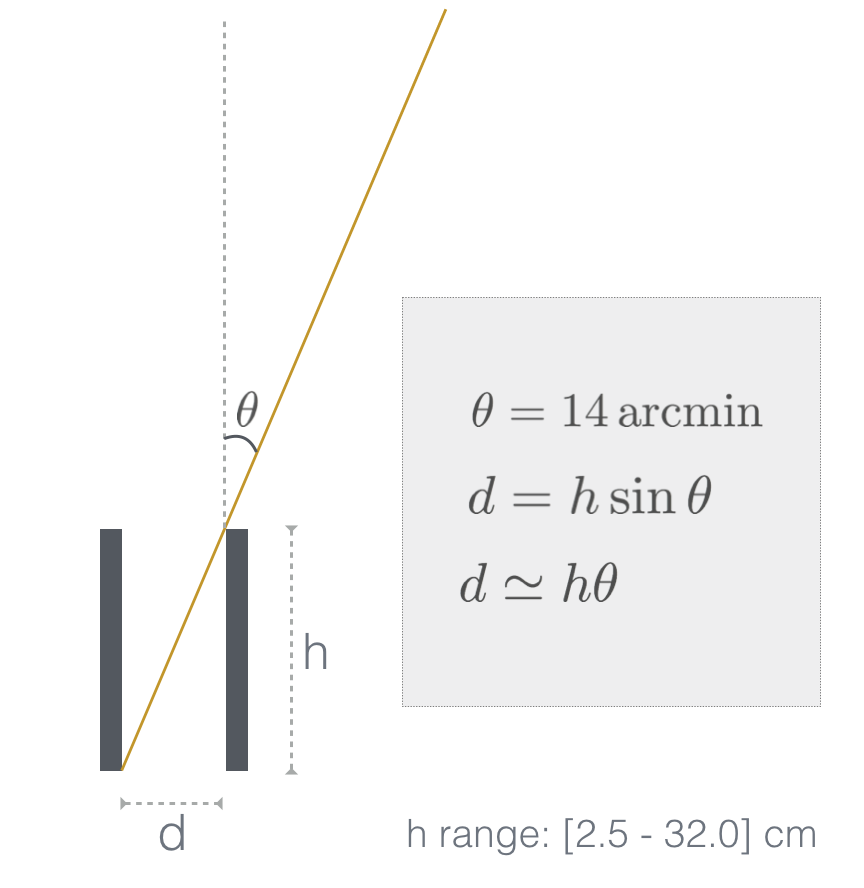

In [2]:
Image("img/concept.png",width=500)

In [3]:
hmin = 2.5    #h_min in cm
hmax = 32.0   #h_max in cm
theta = 14    #angle in arcmin

h = np.linspace(hmin, hmax, num=118)
theta_arcmin = np.deg2rad(theta/60)
d = h * np.sin(theta_arcmin)

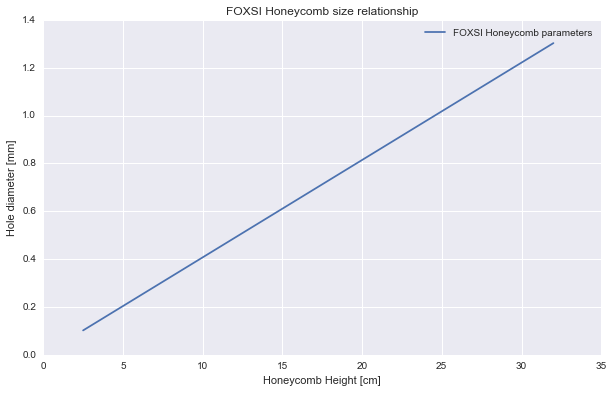

In [4]:
# Plotting
f, ax = plt.subplots(figsize=(10,6))
ax.plot(h, d*1e1, label='FOXSI Honeycomb parameters')
ax.legend(loc='best')
ax.set_title('FOXSI Honeycomb size relationship')
ax.set_xlabel('Honeycomb Height [cm]')
ax.set_ylabel('Hole diameter [mm]')

In [5]:
a = [h, d*10]
data_matrix = np.array(a).T.tolist()
data_matrix1 = [['Honeycomb Height [cm]','Hole diameter [mm]']] + data_matrix

In [7]:
table = FF.create_table(data_matrix1)
py.iplot(table, filename='simple_table')

In [8]:
np.savetxt("foo.csv", data_matrix, delimiter=",")

## Quick estimate of the lossing in the effective area on-axis

For simplicity let's consider a honeycomb with squared holes.

The lossing in effective area is given by:

$1 - \frac{d_h^2}{(d_h+d_s)^2}$

with $d_h$ =: Hole diameter and $d_s$ =: septa thickness 


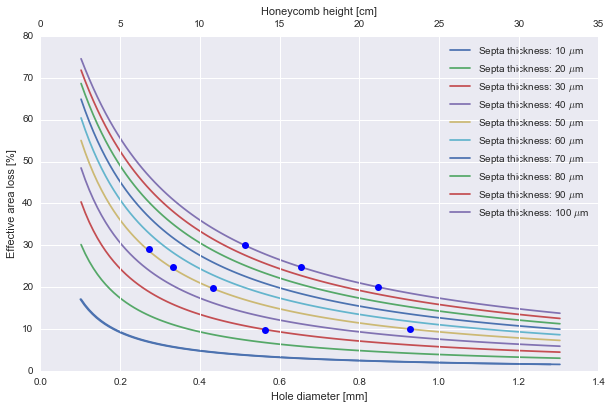

In [17]:
dh = 10*d
ds = np.linspace(0.01, 0.1, num=10) # Septa thickness [in microns]

loss = []
for i in range (0,len(ds)):
    loss.append( 1 - (dh)**2 / (dh + ds[i])**2 )

f1, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twiny()
ax2.plot(h, loss[0]*100, label='Septa thickness: %d $\mu$m'%(1e3*ds[i]))
ax2.set_xlabel('Honeycomb height [cm]')

for i in range (0,len(ds)):
    ax1.plot(dh, loss[i]*100, label='Septa thickness: %d $\mu$m'%(1e3*ds[i]))
ax1.legend(loc='best')
ax1.set_xlabel('Hole diameter [mm]')
ax1.set_ylabel('Effective area loss [%]')


'''Chosing some points for MIKRO'''

qx = np.empty(8)
qy = np.empty(8)
qh = np.empty(8)

# 100 micron septal thickness:
qy[0] = 100*loss[-1][73] #20%
qy[1] = 100*loss[-1][54] #25%
qy[2] = 100*loss[-1][40] #30%

qx[0], qh[0] = dh[73], h[73+1] #20%
qx[1], qh[1] = dh[54], h[54+1] #25%
qx[2], qh[2] = dh[40], h[40+1] #30%


# 50 micron septal thickness:
qy[3] = 100*loss[-6][81] #10%
qy[4] = 100*loss[-6][32] #20%
qy[5] = 100*loss[-6][22] #25%
qy[6] = 100*loss[-6][16] #30%

qx[3], qh[3] = dh[81], h[81+1] #10%
qx[4], qh[4] = dh[32], h[32+1] #20%
qx[5], qh[5] = dh[22], h[22+1] #25%
qx[6], qh[6] = dh[16], h[16+1] #30%

# 30 micron septal thickness:
qy[7] = 100*loss[2][45] #10%
qx[7], qh[7] = dh[45], h[45+1] #10%

'''Estimate the mass of the collimator'''

rho = 7.81 # mass density stainless steal # http://www.psyclops.com/tools/technotes/materials/density.html
radius = 5.7 #cm
area = np.pi*radius**2 * qy/100.
Vol = area * qh
Mass = rho * Vol

ax2.plot(qh, qy,'bo')

## Chosing key points for MIKRO:

In [20]:
thickness = [100,100,100,50,50,50,50,30]
points = [thickness,qy,qx,qh,Mass]
points_matrix = np.array(points).T.tolist()
points_matrix1 = [['Thickness [microns]','Effective area Lossing [%]','Hole diameter [mm]','height [cm]','Collimator Mass [g]']] + points_matrix
#np.savetxt("foo.csv", points_matrix1, delimiter=",")

ptable = FF.create_table(points_matrix1)
py.iplot(ptable, filename='simple_table')